## data checker

----

this is just to verify the data for ms ssim net.

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import numpy as np
np.set_printoptions(threshold=np.nan)
import tensorflow as tf
import time
import pandas as pd
import matplotlib.pyplot as plt
import progressbar

In [4]:
data_path = 'https://raw.githubusercontent.com/michaelneuder/image_quality_analysis/master/data/sample_data/'
contrast_file_data = pd.read_csv('{}contrast_500.csv'.format(data_path), header=None)
structure_file_data = pd.read_csv('{}structure_500.csv'.format(data_path), header=None)
cxs_file_data = pd.read_csv('{}cxs_500.csv'.format(data_path), header=None)

In [5]:
contrast_file_data.shape

(500, 7396)

In [6]:
contrast_data = np.reshape(contrast_file_data.values, (500,86,86))
structure_data = np.reshape(structure_file_data.values, (500,86,86))
cxs_data = np.reshape(cxs_file_data.values, (500,86,86))

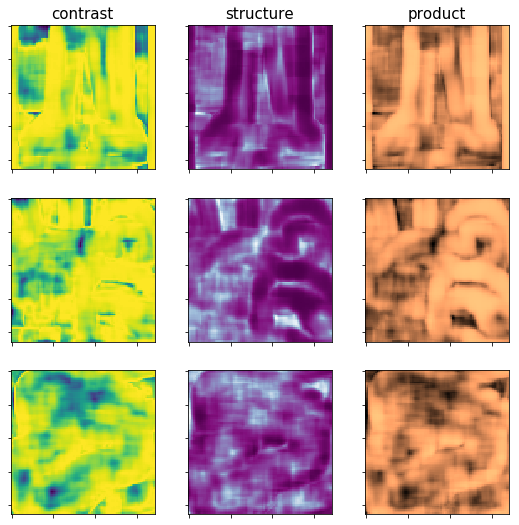

In [7]:
f, axarr = plt.subplots(nrows=3,ncols=3, figsize=(9,9))
for i in range(3):
    index = np.random.randint(500)
    axarr[i,0].imshow(contrast_data[index,:,:], cmap='viridis')
    axarr[i,1].imshow(structure_data[index,:,:], cmap='BuPu')
    axarr[i,2].imshow(cxs_data[index,:,:], cmap='copper')

axarr[0,0].set_title('contrast', size=15)
axarr[0,1].set_title('structure', size=15)
axarr[0,2].set_title('product', size=15)
for ax_row in axarr:
    for ax in ax_row:
        ax.set_xticklabels([])
        ax.set_yticklabels([])

# plt.savefig('c_s_cxs.png')
plt.show()

In [8]:
print(contrast_data[0][0][0]*structure_data[0][0][0])
print(cxs_data[0][0][0])

0.56698305131
0.56698305131


everything looks good with c,s, cxs. now to check the down sampled images as well as luminance.

In [9]:
ds2_orig_file_data = pd.read_csv('{}ds2_orig_500.csv'.format(data_path), header=None)
ds2_recon_file_data = pd.read_csv('{}ds2_recon_500.csv'.format(data_path), header=None)
luminance_file_data = pd.read_csv('{}luminance_500.csv'.format(data_path), header=None)

In [10]:
ds2_orig_file_data.shape

(500, 576)

In [14]:
ds2_orig = np.reshape(ds2_orig_file_data.values, (500, 24, 24))
ds2_recon = np.reshape(ds2_orig_file_data.values, (500, 24, 24))
luminance = np.reshape(luminance_file_data.values, (500, 14, 14))

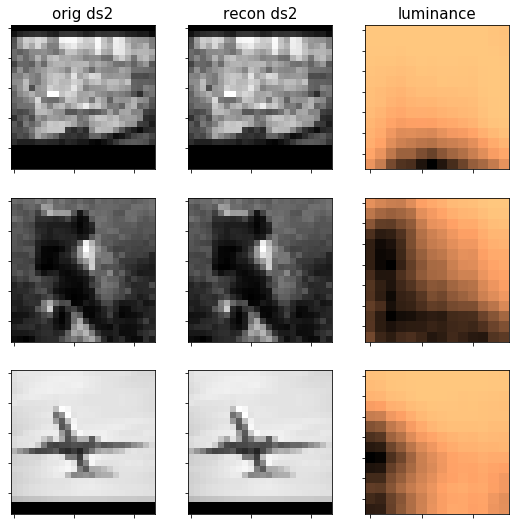

In [19]:
f, axarr = plt.subplots(nrows=3,ncols=3, figsize=(9,9))
for i in range(3):
    index = np.random.randint(500)
    axarr[i,0].imshow(ds2_orig[index,:,:], cmap='gray')
    axarr[i,1].imshow(ds2_orig[index,:,:], cmap='gray')
    axarr[i,2].imshow(luminance[index,:,:], cmap='copper')

axarr[0,0].set_title('orig ds2', size=15)
axarr[0,1].set_title('recon ds2', size=15)
axarr[0,2].set_title('luminance', size=15)
for ax_row in axarr:
    for ax in ax_row:
        ax.set_xticklabels([])
        ax.set_yticklabels([])

# plt.savefig('c_s_cxs.png')
plt.show()

looks good too